# Домашнее задание 2

Используя датасет [STUDENT ALCOHOL CONSUMPTION](https://archive.ics.uci.edu/ml/datasets/STUDENT+ALCOHOL+CONSUMPTION#) и статью "USING	DATA	MINING	TO	PREDICT	SECONDARY SCHOOL	STUDENT	ALCOHOL	CONSUMPTION" выполните следующие задания:

### Предобработка (Max 2)
- Приведите описание признаков датасета на русском языке с указанием типа данных (0.3 балла)
- Описание предобработки данных (1.7)
    - Проверьте наличие пропусков. В случае наличия пропусков заполните их медианными значениями (0.4)
    - Подсчитайте количество людей, у которых матери с образованием "0" (0.4)
    - Преобразуйте все номинальные признаки в несколько признаков с бинарным значение (0.4)
    - Используя объект [SelectKBest](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest) с параметром [f_regression](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression)  выберите два признака, которые наиболее сильно связаны с признаком G3 (0.5)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from pandas import get_dummies

from sklearn.preprocessing import StandardScaler

%matplotlib inline
plt.style.use('ggplot')

### Описание признаков объектов(студентов)

* school - наименование школы (бинарный: "GP" - Gabriel Pereira, "MS" - Mousinho da Silveira)
* sex - пол  (бинарный: "F" - женский или "M" - мужской)
* age - возраст (численный: от 15 до 22)
* address - тип района, в которым проживает (бинарный: "U" - город, "R" - пригород)
* famsize - размер семьи (бинарный: "LE3" - 3 или меньше или "GT3" - больше 3)
* Pstatus - отношения родителей (бинарный: "T" - живут вместе или "A" - живут раздельно)
* Medu - образование матери (численный: 0 - без образования,  1 - начальная школа(4 класс), 2 – средняя школа(5-9 классы), 3 – среднее специальное образование или 4 – высшее образование
* Fedu - образование отца (численный: 0 - без образования,  1 - начальная школа(4 класс), 2 – средняя школа(5-9 классы), 3 – среднее специальное образование или 4 – высшее образование)
* Mjob - сфера занятости матери (категориальный: "teacher", "health", "services", "at_home", "other")
* Fjob - сфера занятости отца (категориальный: "teacher", "health", "services", "at_home", "other")
* reason - причина, по которой выбрали эту школу (категориальный: "home" -близость к дому, "reputation" - репутация школы, "course" - предпочтения к программе, "other" - другое)
* guardian - опекун (категориальный: "mother", "father", "other")
* traveltime - время на дорогу (численный: 1 - меньше 15 мин., 2 - от 15 до 30 мин., 3 - от 30 мин. до 1 часа, 4 - от 1 часа и больше)
* studytime - время на учебу в неделю (численный: 1 - меньше 2 часов, 2 - от 2 до 5 часов, 3 - от 5 до 10 часов, 4 - больше 10 часов)
* failures - количество несданных до этого предметов (численный: n if 1<=n<3, else 4)
* schoolsup - помощь по учебе (бинарный: yes или no)
* famsup - помощь по учебе от семьи (бинарный: yes или no)
* paid - факультативные платные занятия (математика или португальский) (бинарный: yes или no)
* activities - досуг (бинарный: yes или no)
* nursery - посещение подготовки к школе (бинарный: yes или no)
* higher - собирается ли получать высшее образование (бинарный: yes или no)
* internet - доступ в интернет дома (бинарный: yes или no)
* romantic - состоит ли в отношениях (бинарный: yes или no)
* famrel - качество отношений в семье  (численный: от 1 - very bad до 5 - excellent)
* freetime - свободное время (численный: от 1 - очень мало до 5 - много)
* goout - гуляет с друзьями (численный: от 1 - очень редко до 5 - очень часто)
* Dalc - употребление алкоголя в будни (численный: от 1 - очень редко до 5 - очень часто)
* Walc - употребление алкоголя в выходные (численный: от 1 - очень редко до 5 - очень часто)
* health - состояние здоровья (численный: от 1 - очень плохое до 5 - очень хорошее)
* absences - пропуски занятий (численный: от 0 до 93)
* G1 - оценка за первый семестр (численный: от 0 до 20)
* G2 - оценка за второй семестр (численный: от 0 до 20)
* G3 - итоговая оценка (численный: от 0 до 20)



### Пропуски в данных


In [2]:
students_port = pd.read_csv("student-por.csv", sep=";")
students_math = pd.read_csv("student-mat.csv", sep=";")
students = pd.concat([students_port, students_math]).reset_index().drop(['index'], axis=1)

if not students.isnull().values.any():
    print("No missing values")

No missing values


### Матери без образования

In [3]:
print("Количество матерей без образования: ", (students.Medu == 0).sum(axis=0))

Количество матерей без образования:  9


### Preprocessing. OneHotEncoding категориальных признаков

In [4]:
def preprocess(data):
    
    binary_df = pd.DataFrame()
    categorical_df = pd.DataFrame()
    numeric_df = pd.DataFrame()
    

    numeric = [i for i in data.columns if len(set(data[i])) > 5]
    numeric_df = data[numeric]
    data = data.drop(numeric, axis=1)
    data = data.replace({'yes': 1, 'no':0})

    binary = [i for i in data.columns if len(set(data[i])) == 2 and data[i].dtype.name == "int64"]
    binary_df = data[binary]
    data = data.drop(binary, axis=1)

    return pd.concat([pd.get_dummies(data), binary_df, numeric_df], axis=1)

def scale_students(data):
    scaler = StandardScaler()
    return pd.DataFrame(scaler.fit_transform(data), columns = data.columns)


In [5]:
processed_students = preprocess(students)
processed_students.tail()

,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,...,activities,nursery,higher,internet,romantic,age,absences,G1,G2,G3
1039,2,2,1,2,2,5,5,4,4,5,...,0,1,1,0,0,20,11,9,9,9
1040,3,1,2,1,0,2,4,5,3,4,...,0,0,1,1,0,17,3,14,16,16
1041,1,1,1,1,3,5,5,3,3,3,...,0,0,1,0,0,21,3,10,8,7
1042,3,2,3,1,0,4,4,1,3,4,...,0,0,1,1,0,18,0,11,12,10
1043,1,1,1,1,0,3,2,3,3,3,...,0,1,1,1,0,19,5,8,9,9


### SelectKBest. Correlation map
* Убедимся в том, что если мы будем давать на вход SelectKBest датасет с оценками за первый и второй семестр, то он выберет именно их. Просто посмотрим на разность

* Очевидно, что это происходит из-за корреляции между G1, G2 и G3. Посмотрим на корреляцию между друг другом вообще всех признаков

In [6]:
from sklearn.feature_selection import SelectKBest, f_regression

In [7]:
X = processed_students.drop(["G3"], axis=1)
Y = processed_students.G3
X_new = SelectKBest(f_regression, k=2).fit_transform(X, Y)
sum(X_new - np.array(processed_students[["G1", "G2"]]))

array([ 0.,  0.])

In [8]:
X = processed_students.drop(["G1", "G2", "G3"], axis=1)
X_new = SelectKBest(f_regression, k=2).fit_transform(X, Y)
sum(X_new - np.array(processed_students[["G1", "G2"]]))

array([-11431., -10786.])

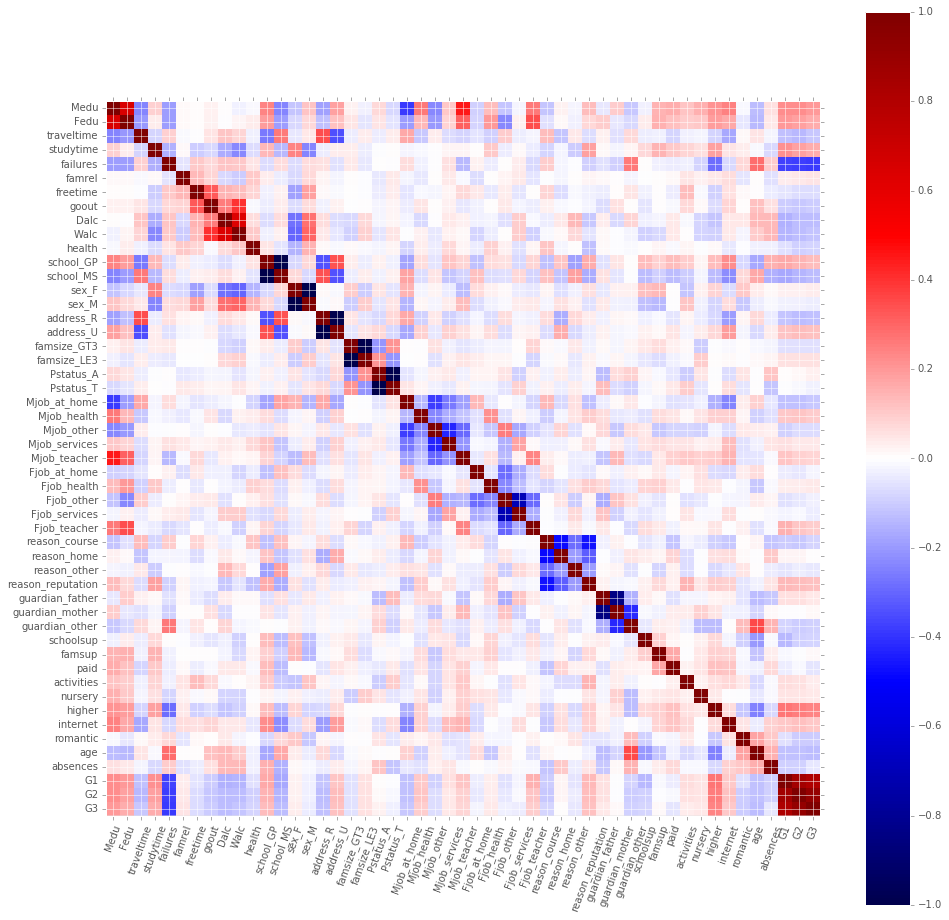

In [9]:
corr_data = processed_students.corr() # corr() сама опускает нечисловые признаки и поэтому мы можем сам

plt.figure(figsize = (16, 16))
plt.imshow(corr_data,cmap='seismic',interpolation='none',vmin=-1,vmax=1)
plt.colorbar()
ax = plt.xticks(range(len(corr_data)),corr_data.columns, rotation=70)
ax = plt.yticks(range(len(corr_data)),corr_data.columns)

* Видно, что квадрат из признаков G1, G2, G3 красный - они все между собой сильно коррелируют

### Регрессия (Max 4)
Выберите один признак, который наиболее влияет на признак G3 и используя кросс-валидацию (cross-validation) выполните, выполните следующее:

- На обучающей выборки обучите объект [RidgeСV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV) для различных alpha (0.2)
- Выберите alpha при котором RidgeCV лучше всего предсказывает значения (0.1)
- Подсчитайте метрику mean absolute error, mean squared error, median absolute error,r2 score(0.2)
- Max (0.5)
- ------------------------------------
- Создайте объекты [SGDRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor), используя все возможных варианты аргумента penalty(0.2)
- Обучите все полученных объекты на обучающей выборке (0.1)
- Подсчитайте метрику r2 score для всех объектов (0.2)
- Max (0.5)
- ------------------------------------
- Создайте объекты с параметрами max_depth = 1,3, 10 [GradientBoostingRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor) и для каждого объекта изменяйте количество n_estimators  от 100 до 1000 с шагом 100 (0.2)
- Подсчитайте метрику r2 score для всех объектов (0.1)
- Визуализируйте зависимость R2 oт n_estimators на графике (0.2)
- Max (0.5)
- -----------------------------------
- Используя все в библиотеке sklearn доступные регрессоры найдите самый лучший. (2.5)

### RidgeСV 

In [10]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import *
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error

In [11]:
def select1best(data):
    X = SelectKBest(f_regression, k=1).fit_transform(data.drop(["G1", "G2", "G3"], axis=1), data["G3"])
    Y = processed_students.G3
    return X, Y
    
X_train, X_test, y_train, y_test = train_test_split(*select1best(processed_students), test_size=0.25, random_state = 42)

In [12]:
alphas = np.linspace(-10, 20, 20)

ridge3fold = RidgeCV(alphas, cv=3)
ridge3fold.fit(X_train, y_train)

predictions = ridge3fold.predict(X_test)


In [13]:
print("Лучшее значение параметра регуляризации alpha: ", ridge3fold.alpha_)
print("MSE: {:f}, MAE: {:f}, Median AE: {:f}, R2: {:f}".format(mean_squared_error(y_test, predictions), 
                                               mean_absolute_error(y_test, predictions), 
                                               median_absolute_error(y_test, predictions), ridge3fold.score(X_test, y_test)))

Лучшее значение параметра регуляризации alpha:  13.6842105263
MSE: 13.628810, MAE: 2.701215, Median AE: 2.066471, R2: 0.083012


### SGDRegressor


In [14]:
def train_sgd(data, target, penalty):
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state = 442)
    sgd = SGDRegressor(penalty=penalty)
    sgd.fit(X_train, y_train)
    score = sgd.score(X_test, y_test)
    scores.append(score)
    cur_mse = mean_squared_error(y_test, sgd.predict(X_test))
    mse.append(cur_mse)
    print("="*30)
    print("MSE on {}: {:f}".format(penalty, cur_mse))
    print("R2 on {}: {:f}".format(penalty, score))
    


In [15]:
penalties = [None, 'l2', 'l1', 'elasticnet']
scores = []
mse = []
for current_penalty in penalties:
    train_sgd(*select1best(processed_students), current_penalty)

MSE on None: 14.569920
R2 on None: 0.127382
MSE on l2: 14.569717
R2 on l2: 0.127394
MSE on l1: 14.560596
R2 on l1: 0.127940
MSE on elasticnet: 14.567456
R2 on elasticnet: 0.127530


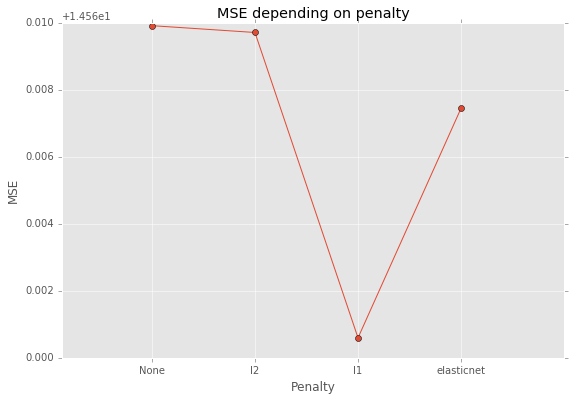

In [16]:
plt.figure(figsize=(9, 6))
plt.title("MSE depending on penalty")
plt.plot(mse, marker='o')
plt.xlim(min(scores)-1, 4)
plt.ylabel('MSE')
plt.xlabel('Penalty')
ax = plt.xticks([0, 1, 2, 3], penalties)

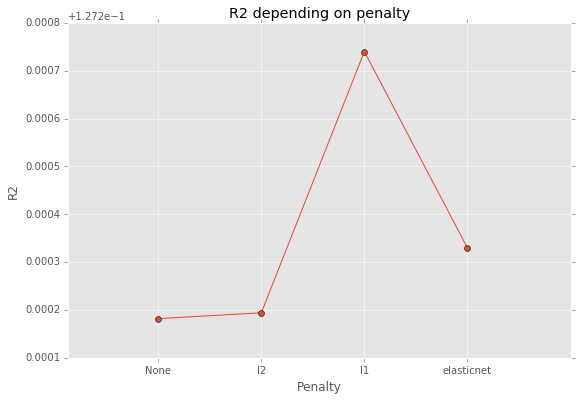

In [17]:
plt.figure(figsize=(9, 6))
plt.title("R2 depending on penalty")
plt.plot(scores, marker='o')
plt.xlim(min(scores)-1, 4)
plt.ylabel('R2')
plt.xlabel('Penalty')
ax = plt.xticks([0, 1, 2, 3], penalties)

* Относительно этого регрессора не удалось получить интерпретируемых результатов : каждый раз получаются разные показатели норм регуляризации penalty и слишком малые значения коэффициента детерминации $R^2$

### Gradient Boosting Regression

In [18]:
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor

In [19]:
def train_gbr(data, target, cur_depth, cur_n_estimators):
    gbr = GradientBoostingRegressor(n_estimators=cur_n_estimators, max_depth=cur_depth)
    gbr.fit(X_train, y_train)
    gbr_scores.append(gbr.score(X_test, y_test))

Лучшее R2 на глубине 1.000000 : 0.07228277540465311
Лучшее R2 на глубине 3.000000 : 0.072220254849039253
Лучшее R2 на глубине 10.000000 : 0.072220254849039253


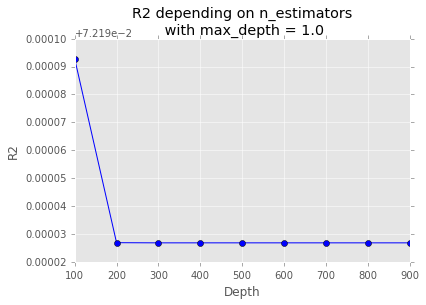

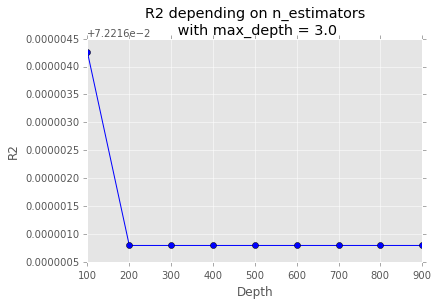

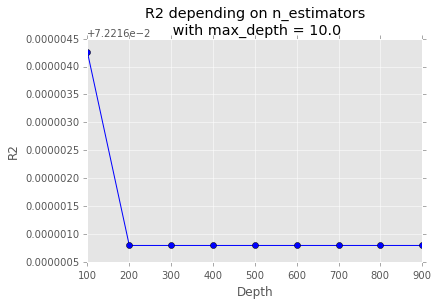

In [20]:
depths = [1, 3, 10]
n_of_estimators = np.arange(100, 1000, 100)

for cur_d in depths:
    gbr_scores = []
    for cur_n in n_of_estimators:
        train_gbr(*select1best(processed_students), cur_d, cur_n)
    plt.figure()
    plt.title("R2 depending on n_estimators\n with max_depth = {:.1f}".format(cur_d))
    plt.plot(gbr_scores, marker='o', color='b')
    plt.ylabel('R2')
    plt.xlabel('Depth')
    ax = plt.xticks(range(len(n_of_estimators)), n_of_estimators)
    print("Лучшее R2 на глубине {:f} : {!r}".format(cur_d, max(gbr_scores)))

### Результаты других регрессоров

In [21]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_validation import cross_val_score

In [248]:
estimators = {
    "ExtraTreesRegressor": ExtraTreesRegressor(),
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "RandonForestRegressor": RandomForestRegressor(),
    "BayesianRidge": BayesianRidge(),
    "LassoCV": LassoCV()
    #"LassoLarsCV": LassoLarsCV()
}



In [249]:
def train_evaluate(X_train, X_test, y_train, y_test,  model, name):
    #X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state = 442)
    cur_model = model.fit(X_train, y_train)
    scores = cross_val_score(cur_model, X_train, y_train, cv=5)
    test_scores[name] = cur_model.score(X_test, y_test)
    plt.title("R2 on validation")
    plt.plot(scores, marker='o', label = name)
    plt.legend()
    plt.ylabel('R2')
    

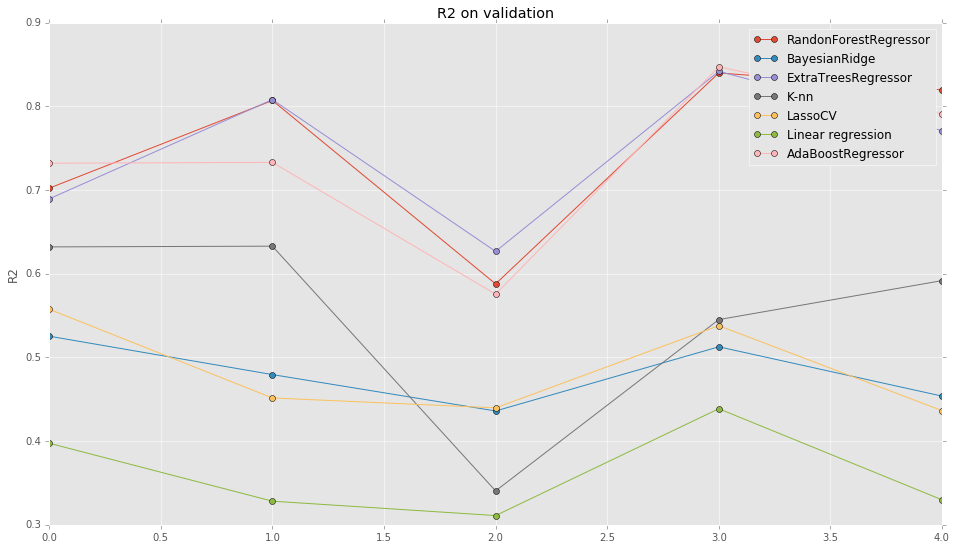

In [252]:
ax = plt.figure(figsize=(16,9))
test_scores = {}
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state = 442)
for name, model in estimators.items():
    train_evaluate(X_train, X_test, y_train, y_test, model, name)

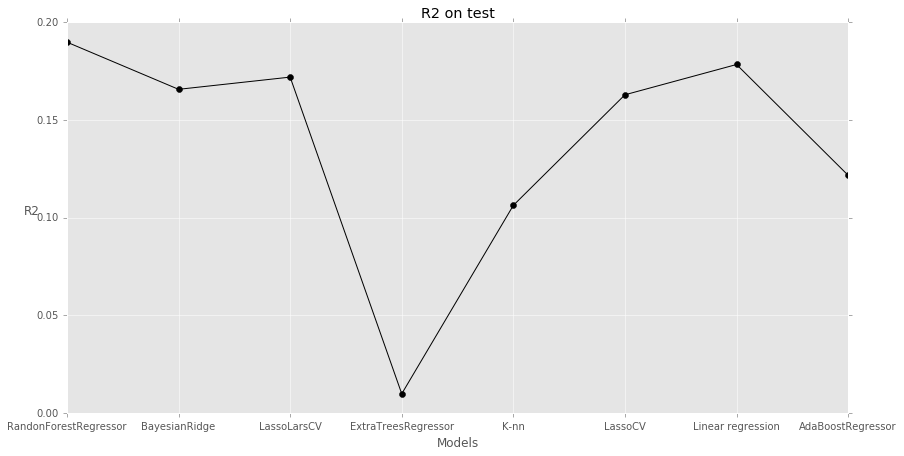

In [25]:
plt.figure(figsize=(14, 7))
plt.title("R2 on test")
plt.plot(list(test_scores.values()), marker='o', color='black')
plt.ylabel('R2', rotation=0)
plt.xlabel("Models")
ax = plt.xticks(range(len(list(test_scores.keys()))), list(test_scores.keys()))

* учитывая полученные результаты, можно сделать вывод, что регрессор, использующий $k-NN$ является лучшим
* попробуем улучшить результат, подобрав гиперпараметры с помощью кросс-валидации
* будем обучаться на следующих наборах:
    * датасет с оценками за оба предмета
    * только по математике
    * только по португальскому
    * отмасштабированные данные
* для каждого из них рассмотрим случаи А, В, С, согласно статье:
    * А - отбросим только оценку G3
    * B - отбросим оценки G2, G3
    * C - отбросим оценки G1, G3
 

In [26]:
from sklearn.grid_search import GridSearchCV


In [27]:
def rfCV(data, target, scores,name, folds=5):
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=42)
    rf_params = {"n_estimators": [100, 200],#np.arange(1, 400, 30),
                 "max_depth": [1, 3],
                 #"min_samples_split": [1, 3, 10],
                 #"min_samples_leaf": [1, 3, 10],
                 #"bootstrap": [True, False],
              }
    rf_grid = GridSearchCV(RandomForestRegressor(), rf_params, cv=folds, verbose=1, n_jobs=3)
    
    rf_grid.fit(X_train, y_train)
    predictions = rf_grid.best_estimator_.predict(X_test)
    r2=rf_grid.best_estimator_.score(X_test, y_test)
    scores2 = scores_r2.append(r2)
    print(30*"="+"\n"+name+"\n"+30*"=")
    print("MSE on test:", mean_squared_error(y_test, predictions))
    print("R2 on test:", r2)
    
    print("\nOn validation\n")
    for params, mean_score, scores in rf_grid.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() / 2, params))

In [28]:
A = ["G3"]
B = ["G2", "G3"]
C = ["G1", "G3"]
scores_r2 = []

processed_students = preprocess(students)
math_preprocessed = preprocess(students_math)
port_preprocessed = preprocess(students_port)
scaled_both = scale_students(processed_students)
scaled_math = scale_students(math_preprocessed)
scaled_port = scale_students(port_preprocessed)

datasets = [processed_students, math_preprocessed, port_preprocessed, scaled_both, scaled_math, scaled_port]

dataset_names = ("both subjects", "math", "portugal",  "scaled_both", "scaled_math", "scaled_portugal")
new_names = [i+" without "+str(j) for i in dataset_names for j in [A, B, C] ]

current=0
for cur_ds in datasets:
    for to_drop in [A, B, C]:
        X = cur_ds.drop(to_drop, axis = 1)
        Y = cur_ds.G3
        rfCV(X, Y, scores_r2, new_names[current])
        current+=1

  

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:    3.6s finished


both subjects without ['G3']
MSE on test: 2.0086189932
R2 on test: 0.86485397417

On validation

0.550 (+/-0.015) for {'n_estimators': 100, 'max_depth': 1}
0.549 (+/-0.016) for {'n_estimators': 200, 'max_depth': 1}
0.830 (+/-0.023) for {'n_estimators': 100, 'max_depth': 3}
0.829 (+/-0.023) for {'n_estimators': 200, 'max_depth': 3}
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:    2.9s finished


both subjects without ['G2', 'G3']
MSE on test: 4.31202463352
R2 on test: 0.709873801614

On validation

0.479 (+/-0.010) for {'n_estimators': 100, 'max_depth': 1}
0.482 (+/-0.011) for {'n_estimators': 200, 'max_depth': 1}
0.667 (+/-0.049) for {'n_estimators': 100, 'max_depth': 3}
0.666 (+/-0.050) for {'n_estimators': 200, 'max_depth': 3}
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:    3.1s finished


both subjects without ['G1', 'G3']
MSE on test: 1.96712883968
R2 on test: 0.867645558526

On validation

0.549 (+/-0.017) for {'n_estimators': 100, 'max_depth': 1}
0.550 (+/-0.015) for {'n_estimators': 200, 'max_depth': 1}
0.832 (+/-0.022) for {'n_estimators': 100, 'max_depth': 3}
0.831 (+/-0.024) for {'n_estimators': 200, 'max_depth': 3}
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:    2.4s finished


math without ['G3']
MSE on test: 2.8452782589
R2 on test: 0.876495512655

On validation

0.566 (+/-0.025) for {'n_estimators': 100, 'max_depth': 1}
0.571 (+/-0.020) for {'n_estimators': 200, 'max_depth': 1}
0.862 (+/-0.018) for {'n_estimators': 100, 'max_depth': 3}
0.866 (+/-0.016) for {'n_estimators': 200, 'max_depth': 3}
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:    2.3s finished


math without ['G2', 'G3']
MSE on test: 5.76429559611
R2 on test: 0.749790246253

On validation

0.477 (+/-0.032) for {'n_estimators': 100, 'max_depth': 1}
0.472 (+/-0.033) for {'n_estimators': 200, 'max_depth': 1}
0.715 (+/-0.036) for {'n_estimators': 100, 'max_depth': 3}
0.713 (+/-0.036) for {'n_estimators': 200, 'max_depth': 3}
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:    2.3s finished


math without ['G1', 'G3']
MSE on test: 2.98340954093
R2 on test: 0.870499672664

On validation

0.576 (+/-0.018) for {'n_estimators': 100, 'max_depth': 1}
0.571 (+/-0.019) for {'n_estimators': 200, 'max_depth': 1}
0.864 (+/-0.016) for {'n_estimators': 100, 'max_depth': 3}
0.866 (+/-0.018) for {'n_estimators': 200, 'max_depth': 3}
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:    2.7s finished


portugal without ['G3']
MSE on test: 1.40440814357
R2 on test: 0.860682368177

On validation

0.533 (+/-0.014) for {'n_estimators': 100, 'max_depth': 1}
0.529 (+/-0.012) for {'n_estimators': 200, 'max_depth': 1}
0.831 (+/-0.026) for {'n_estimators': 100, 'max_depth': 3}
0.831 (+/-0.027) for {'n_estimators': 200, 'max_depth': 3}
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:    2.5s finished


portugal without ['G2', 'G3']
MSE on test: 2.99634438759
R2 on test: 0.702761902858

On validation

0.497 (+/-0.030) for {'n_estimators': 100, 'max_depth': 1}
0.499 (+/-0.031) for {'n_estimators': 200, 'max_depth': 1}
0.715 (+/-0.019) for {'n_estimators': 100, 'max_depth': 3}
0.715 (+/-0.019) for {'n_estimators': 200, 'max_depth': 3}
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:    2.8s finished


portugal without ['G1', 'G3']
MSE on test: 1.39579437957
R2 on test: 0.861536855675

On validation

0.529 (+/-0.012) for {'n_estimators': 100, 'max_depth': 1}
0.528 (+/-0.011) for {'n_estimators': 200, 'max_depth': 1}
0.829 (+/-0.027) for {'n_estimators': 100, 'max_depth': 3}
0.831 (+/-0.027) for {'n_estimators': 200, 'max_depth': 3}
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:    3.1s finished


scaled_both without ['G3']
MSE on test: 0.13478117139
R2 on test: 0.864676925443

On validation

0.555 (+/-0.014) for {'n_estimators': 100, 'max_depth': 1}
0.554 (+/-0.015) for {'n_estimators': 200, 'max_depth': 1}
0.829 (+/-0.023) for {'n_estimators': 100, 'max_depth': 3}
0.831 (+/-0.022) for {'n_estimators': 200, 'max_depth': 3}
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:    3.6s finished


scaled_both without ['G2', 'G3']
MSE on test: 0.287629410564
R2 on test: 0.711214142381

On validation

0.482 (+/-0.012) for {'n_estimators': 100, 'max_depth': 1}
0.479 (+/-0.009) for {'n_estimators': 200, 'max_depth': 1}
0.668 (+/-0.051) for {'n_estimators': 100, 'max_depth': 3}
0.668 (+/-0.053) for {'n_estimators': 200, 'max_depth': 3}
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:    2.6s finished


scaled_both without ['G1', 'G3']
MSE on test: 0.133236486868
R2 on test: 0.866227820546

On validation

0.550 (+/-0.017) for {'n_estimators': 100, 'max_depth': 1}
0.551 (+/-0.016) for {'n_estimators': 200, 'max_depth': 1}
0.831 (+/-0.021) for {'n_estimators': 100, 'max_depth': 3}
0.830 (+/-0.023) for {'n_estimators': 200, 'max_depth': 3}
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:    2.1s finished


scaled_math without ['G3']
MSE on test: 0.1401819558
R2 on test: 0.872604603566

On validation

0.566 (+/-0.025) for {'n_estimators': 100, 'max_depth': 1}
0.566 (+/-0.019) for {'n_estimators': 200, 'max_depth': 1}
0.865 (+/-0.017) for {'n_estimators': 100, 'max_depth': 3}
0.867 (+/-0.017) for {'n_estimators': 200, 'max_depth': 3}
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:    2.7s finished


scaled_math without ['G2', 'G3']
MSE on test: 0.289401455506
R2 on test: 0.736996013915

On validation

0.476 (+/-0.028) for {'n_estimators': 100, 'max_depth': 1}
0.473 (+/-0.030) for {'n_estimators': 200, 'max_depth': 1}
0.712 (+/-0.034) for {'n_estimators': 100, 'max_depth': 3}
0.713 (+/-0.035) for {'n_estimators': 200, 'max_depth': 3}
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:    2.6s finished


scaled_math without ['G1', 'G3']
MSE on test: 0.142108204025
R2 on test: 0.870854056181

On validation

0.563 (+/-0.020) for {'n_estimators': 100, 'max_depth': 1}
0.566 (+/-0.023) for {'n_estimators': 200, 'max_depth': 1}
0.865 (+/-0.017) for {'n_estimators': 100, 'max_depth': 3}
0.867 (+/-0.015) for {'n_estimators': 200, 'max_depth': 3}
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:    2.3s finished


scaled_portugal without ['G3']
MSE on test: 0.131725183607
R2 on test: 0.863826260133

On validation

0.527 (+/-0.014) for {'n_estimators': 100, 'max_depth': 1}
0.526 (+/-0.011) for {'n_estimators': 200, 'max_depth': 1}
0.832 (+/-0.026) for {'n_estimators': 100, 'max_depth': 3}
0.831 (+/-0.028) for {'n_estimators': 200, 'max_depth': 3}
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:    2.5s finished


scaled_portugal without ['G2', 'G3']
MSE on test: 0.286100087156
R2 on test: 0.70423788544

On validation

0.495 (+/-0.031) for {'n_estimators': 100, 'max_depth': 1}
0.496 (+/-0.032) for {'n_estimators': 200, 'max_depth': 1}
0.716 (+/-0.019) for {'n_estimators': 100, 'max_depth': 3}
0.716 (+/-0.018) for {'n_estimators': 200, 'max_depth': 3}
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:    3.1s finished


scaled_portugal without ['G1', 'G3']
MSE on test: 0.133428566264
R2 on test: 0.862065351699

On validation

0.524 (+/-0.012) for {'n_estimators': 100, 'max_depth': 1}
0.529 (+/-0.011) for {'n_estimators': 200, 'max_depth': 1}
0.831 (+/-0.027) for {'n_estimators': 100, 'max_depth': 3}
0.831 (+/-0.026) for {'n_estimators': 200, 'max_depth': 3}


Best R2:0.876496 on math without ['G3']


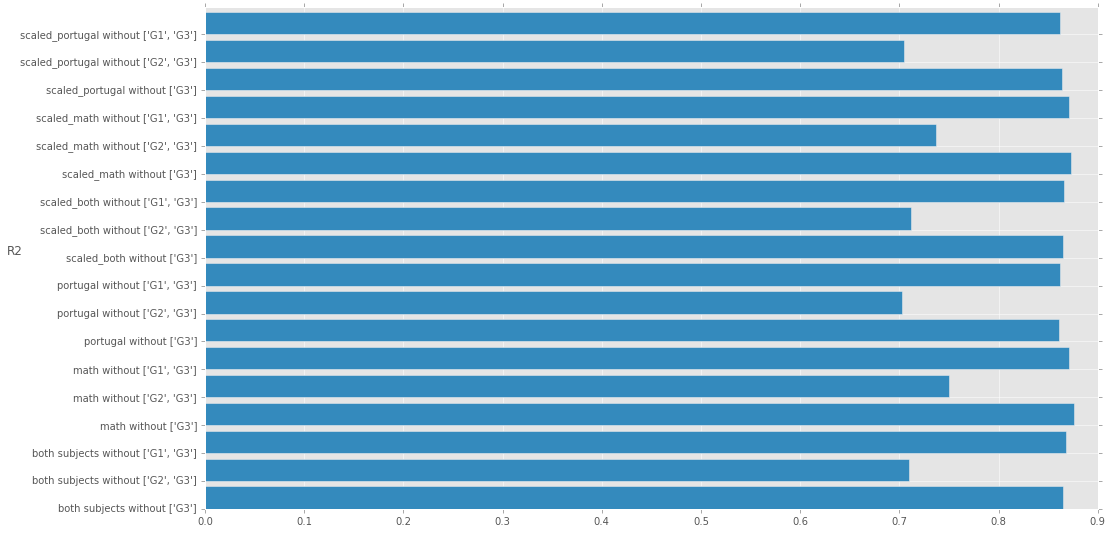

In [29]:
print("Best R2:{:f} on {}".format(max(scores_r2), new_names[scores_r2.index(max(scores_r2))]))
plt.figure(figsize=(16, 9))
plt.barh(np.arange(len(new_names)), scores_r2, )
plt.yticks(np.arange(len(new_names)), tuple(new_names), )
plt.ylabel('R2', rotation=0)


### Results
Даже учитывая ограниченность в вычислительных ресурсах, которая не позволила проводить более тщательный подбор гиперпараметров(если убрать комментарии в словаре rf_params, то будет не 20 фитов для каждого датасета, а 65) обратим внимание на следующий результат : 
* на датасете с оценками G1 и G2, содержащем оценки за оба предмета  мы получили довольно хорошую $RMSE$, сравнимую с результатами статьи: 2.02
* можно предположить, что увеличив количество объектов для обучения, мы повысили обобщающую способность модели

### Классификация (Max 4)
- В статье описано использование Random Forest для предсказания важности фактором вляющих на потребление алкоголя. Повторите эксперимент с использование объекта [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier) и найдите наилучшие параметры. Обязательно наличие графика(ов) зависимости mean accuracy от различных параметров классификатора для объектов с различными параметрами (0.5)
- Обучите объект [GradientBoostingClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier)  и найдите для него наилучшие параметры. Обязательно наличие графика(ов) зависимости mean accuracy от различных параметров классификатора для объектов с различными параметрами (0.5)
- Обучите объект [AdaBoostClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)  и найдите для него наилучшие параметры. Обязательно наличие графика(ов) зависимости mean accuracy от различных параметров классификатора для объектов с различными параметрами (0.5)
- Найдите наилучший классификатор. Обязательно наличие графика(ов) зависимости mean accuracy от различных параметров классификатора для объектов с различными параметрами (2.5)

- ------------------------------------

* в статье описано предсказание итоговой оценки по социальным и другим факторам, один из которых алкоголь
* рассмотривались следующие подходы к классификации: 
    * бинарная(сдал\не сдал, threshold G3: 10)
    * мультиклассификация(5 классов, согласно [Erasmus grade conversion table](http://www.usaintlouis.be/sl/images/15023.png)

In [283]:
def grades_to_binary(grades):
    return pd.Series([0 if i in np.arange(0, 10) else 1 for i in grades])

def grades_to_erasmus(grades):
    erasmus = []
    marks = [np.arange(0, 10), np.arange(10, 11), np.arange(11, 13),
             np.arange(13, 15), np.arange(15, 17), np.arange(17, 21)]
    for i in grades:
        for ind, j in enumerate(marks):
            if i in marks[ind]:
                erasmus.append(ind)
    #print(marks)
    return pd.Series(erasmus)
            

#### Feature selection
* будем выбирать признаки следующим образом: 
    * надеяться на способности модели к выбору релевантых признаков (Random Forest, Extra Trees)
    * SelectKbest при разных k
* посмотрим, что лучше работает для модели RandomForest и в дальнейшем будем использовать это

#### Results visualization

* будем заносить результаты моделей при разных параметрах в словарь, ключ которого будут параметры, а значением показателем accuracy_score(в статье то же самое  - Percentage of Correct Classifications)
* затем построим bar chart и ROC кривую

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc

In [333]:
def train_rf(data, target, folds=5):
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=442)
    rfc_params = {"max_depth": [3, 5, 7, 10],
                  #"n_estimators": [50, 100, 150, 300]}
                  #"bootstrap": [True, False], 
                  "min_samples_split": [2, 3, 4, 5]}
    rf_grid = GridSearchCV(RandomForestClassifier(), rfc_params, cv=folds, n_jobs=3)
    rf_grid.fit(X_train, y_train)
    
    predictions = rf_grid.best_estimator_.predict(X_test)
    plot_roc(y_test.ravel(), predictions.ravel(), len(y_test.unique()))
    
    for params, mean_score, scores in rf_grid.grid_scores_:
        scores_clf[str(params)] = mean_score

In [371]:
def plot_roc(true, preds, n_classes):
    fpr, tpr, thresholds = roc_curve(true, preds)
    colors_ = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b', 'g', 'r', 'c', 'm', 'y', 'k']
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, colors_[plot_roc.current], label='AUC, case {} = {:.2f}'.format(cases[plot_roc.current], roc_auc))
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plot_roc.current+=1

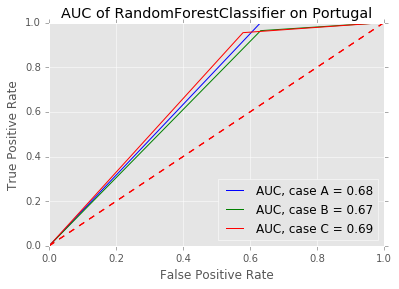

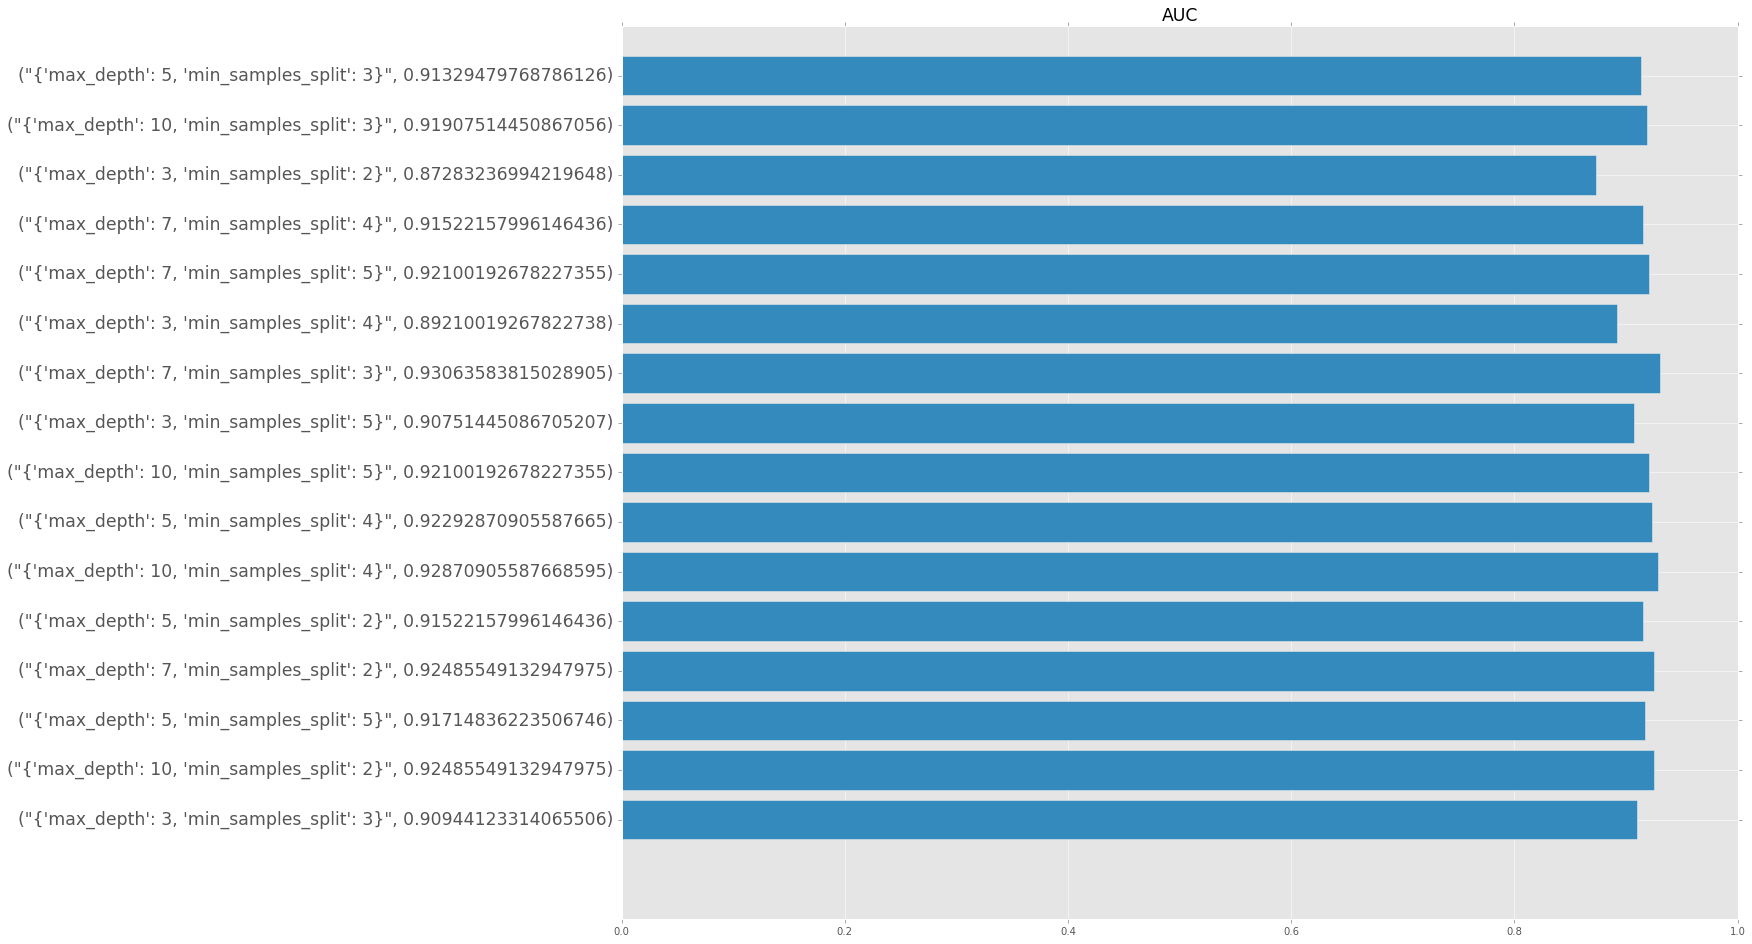

In [336]:
scores_clf = {}
cases = ["A", "B", "C"]
plot_roc.current = 0
plt.figure()
plt.title("AUC of RandomForestClassifier on Portugal")
for to_drop in [A, B, C]:
    
    X = port_preprocessed.drop(to_drop, axis = 1)
    Y = grades_to_binary(port_preprocessed.G3)
    train_rf(X, Y)
    
plt.figure(figsize=(20, 16))
plt.barh(np.arange(len(list(scores_clf.items()))), scores_clf.values(), align='center')
plt.yticks(np.arange(len(list(scores_clf.items()))), list(scores_clf.items()), fontsize="xx-large")
plt.title('AUC', rotation=0, fontsize="xx-large")

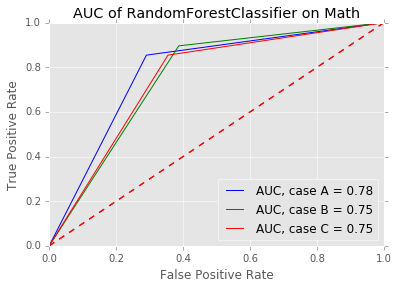

In [337]:
scores_clf = {}
plot_roc.current = 0
plt.figure()
plt.title("AUC of RandomForestClassifier on Math")
for to_drop in [A, B, C]:
    X = math_preprocessed.drop(to_drop, axis = 1)
    Y = grades_to_binary(math_preprocessed.G3)
    train_rf(X, Y)

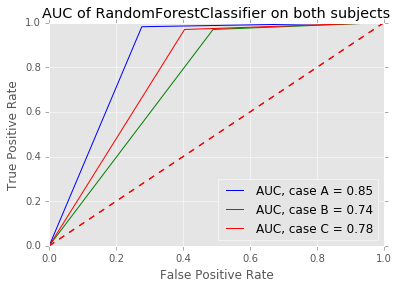

In [338]:
scores_clf = {}
plot_roc.current = 0
plt.figure()
plt.title("AUC of RandomForestClassifier on both subjects")
for to_drop in [A, B, C]:
    X = processed_students.drop(to_drop, axis = 1)
    Y = grades_to_binary(processed_students.G3)
    train_rf(X, Y)

### SelectKbest

In [256]:
def selectKbest(data, n_k, to_drop):
    return SelectKBest(f_regression, k=n_k).fit_transform(data.drop(to_drop, axis=1), data["G3"])
    
    

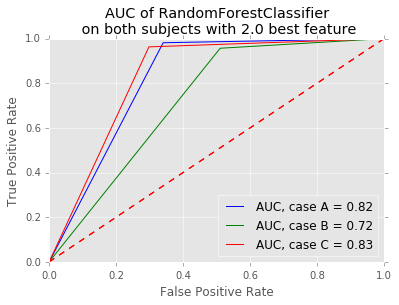

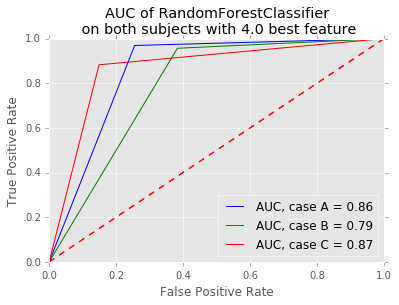

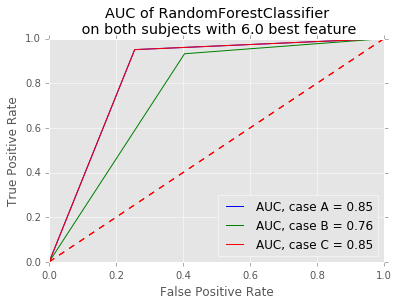

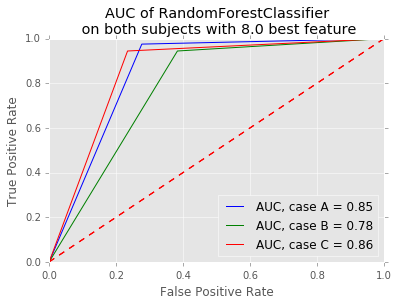

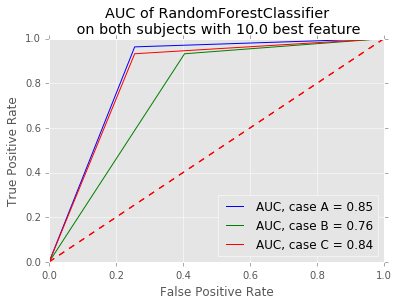

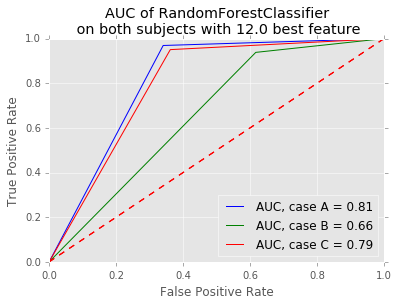

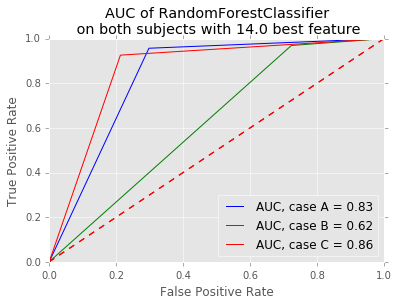

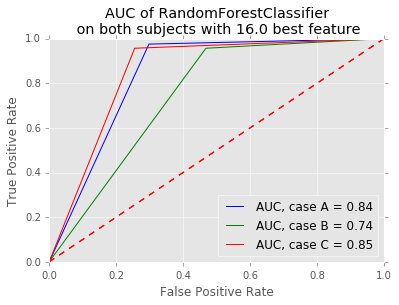

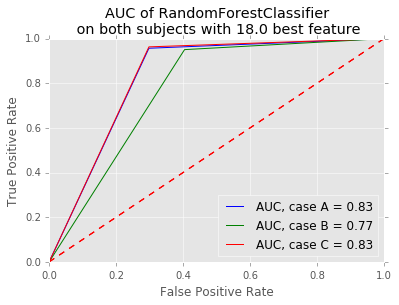

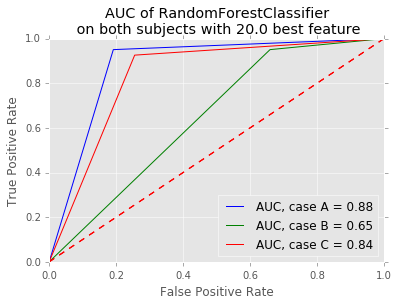

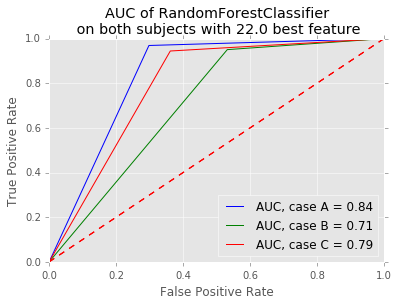

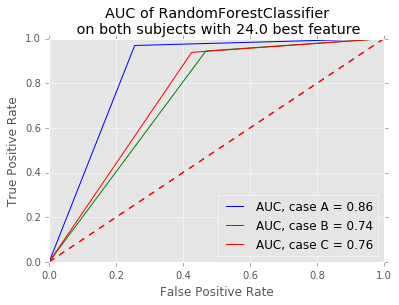

In [292]:
for k in np.arange(2, 25, 2):
    scores_clf = {}
    plot_roc.current = 0
    plt.figure()
    plt.title("AUC of RandomForestClassifier\n on both subjects with {:.1f} best feature".format(k))
    for to_drop in [A, B, C]:
        X = selectKbest(processed_students, k, to_drop)
        Y = grades_to_binary(processed_students.G3)
        train_rf(X, Y)

* по ROC кривым выше, можно понять, что RandomForestClassifier удачно справляется с неиформтивными признаками сам

* дальше будем работать с датасетом processed_students, содержащим оба предмета

### GradientBoostingClassifier

In [339]:
from sklearn.ensemble import GradientBoostingClassifier

In [375]:
def train_gbc(data, target, folds=5):
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=442)
    gbc_params = {"max_depth": [3, 5, 7, 10],
                  #"n_estimators": [50, 100, 150, 300]}
                  #"bootstrap": [True, False], 
                  "min_samples_split": [2, 3, 4, 5]}
                  #"learning_rate": [0.01, 0.03, 0.1, 0.2]}
    gbc_grid = GridSearchCV(GradientBoostingClassifier(), gbc_params, cv=folds, n_jobs=3)
    gbc_grid.fit(X_train, y_train)
    
    predictions = gbc_grid.best_estimator_.predict(X_test)
    plot_roc(y_test.ravel(), predictions.ravel(), len(y_test.unique()))
    
    for params, mean_score, scores in gbc_grid.grid_scores_:
        scores_clf[str(params)] = mean_score

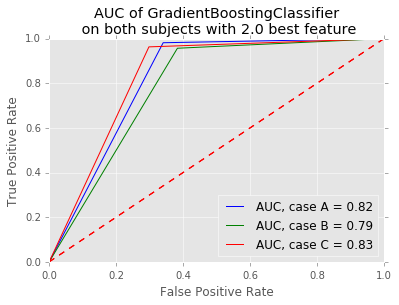

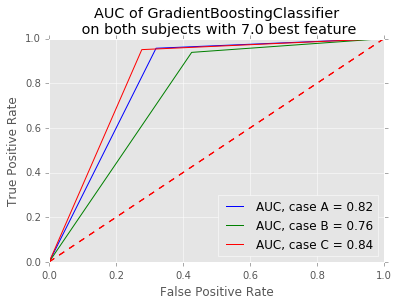

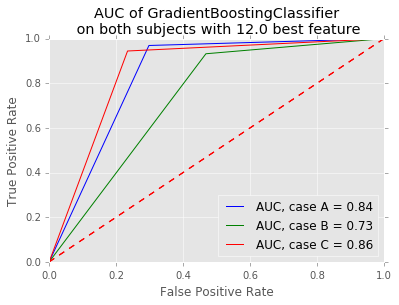

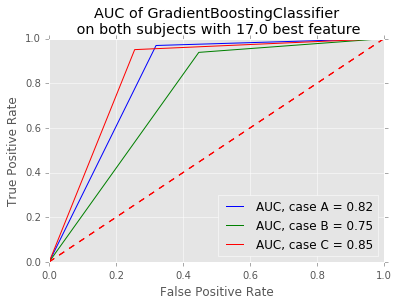

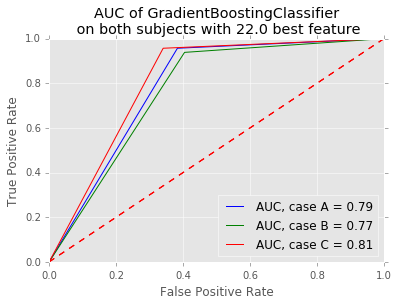

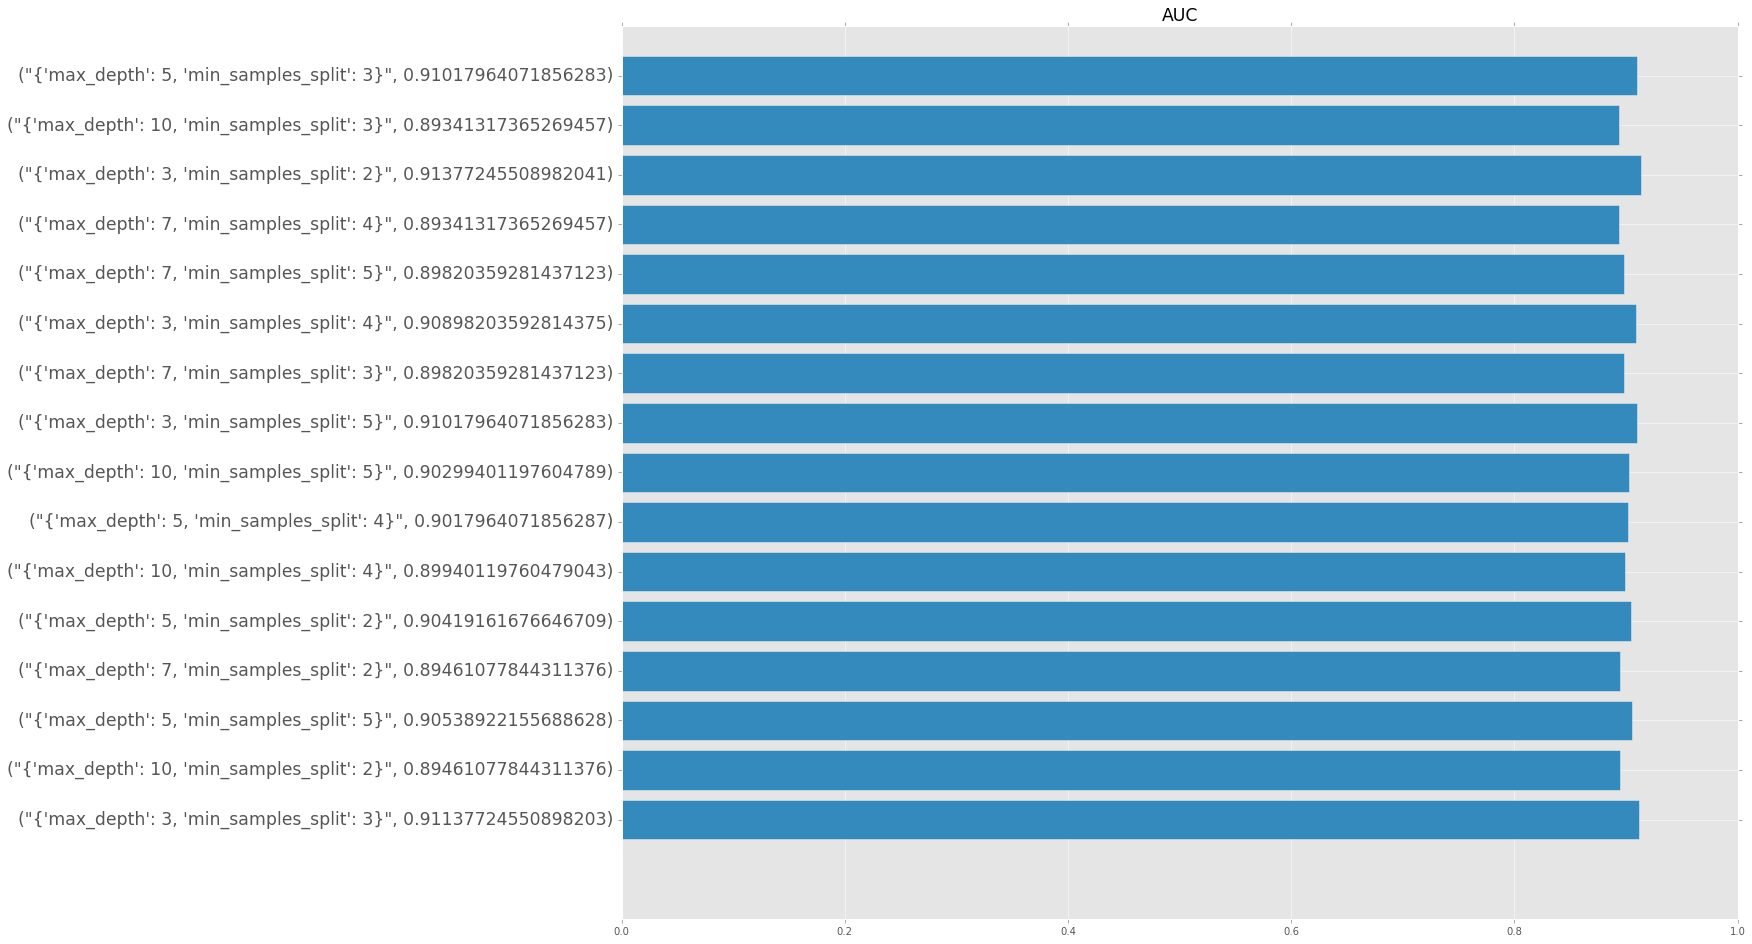

In [376]:
for k in np.arange(2, 25, 5):
    scores_clf = {}
    plot_roc.current = 0
    plt.figure()
    plt.title("AUC of GradientBoostingClassifier\n on both subjects with {:.1f} best feature".format(k))
    for to_drop in [A, B, C]:
        X = selectKbest(processed_students, k, to_drop)
        Y = grades_to_binary(processed_students.G3)
        train_gbc(X, Y)

plt.figure(figsize=(20, 16))
plt.barh(np.arange(len(list(scores_clf.items()))), scores_clf.values(), align='center')
plt.yticks(np.arange(len(list(scores_clf.items()))), list(scores_clf.items()), fontsize="xx-large")
plt.title('AUC', rotation=0, fontsize="xx-large")

### AdaBoostClassifier

In [378]:
from sklearn.ensemble import AdaBoostClassifier

In [377]:
def train_abc(data, target, folds=5):
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=442)
    abc_params = {"n_estimators": [50, 100, 150, 300]}
                  #"learning_rate": [0.03, 0.1, 0.2]}
    abc_grid = GridSearchCV(AdaBoostClassifier(RandomForestClassifier(max_depth=10, min_samples_split=3)), abc_params, cv=folds, n_jobs=3)
    abc_grid.fit(X_train, y_train)
    
    predictions = abc_grid.best_estimator_.predict(X_test)
    plot_roc(y_test.ravel(), predictions.ravel(), len(y_test.unique()))
    
    for params, mean_score, scores in abc_grid.grid_scores_:
        scores_clf[str(params)] = mean_score

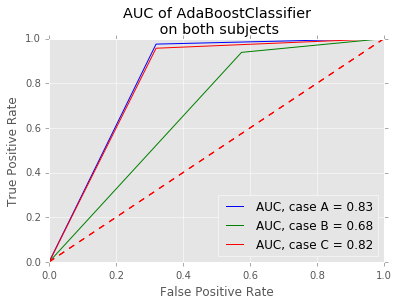

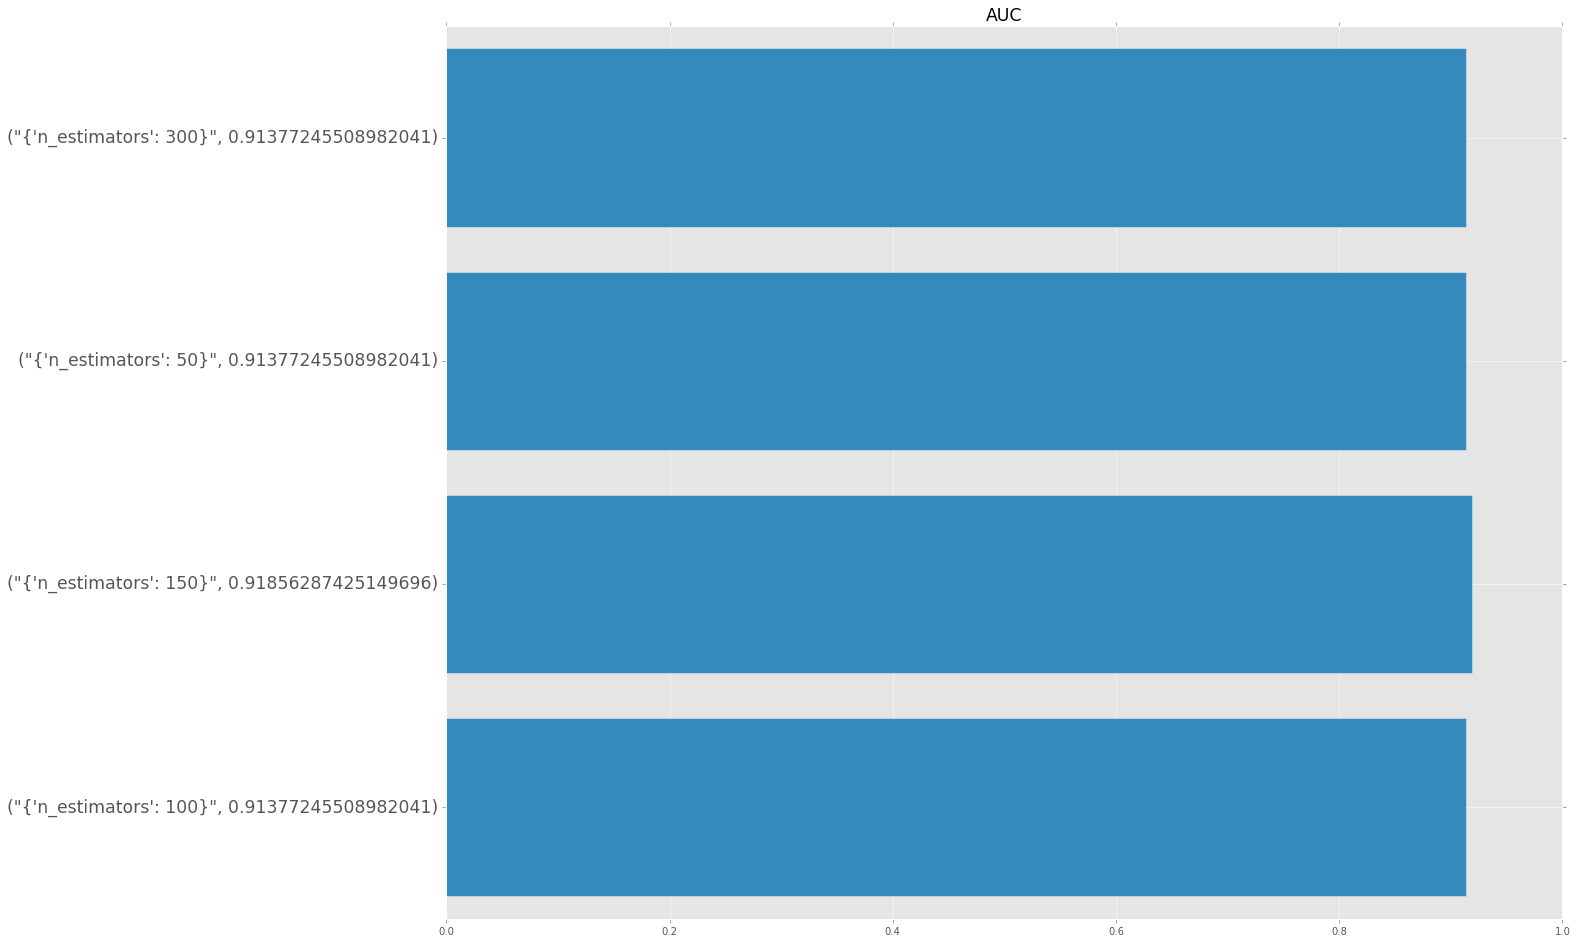

In [379]:
scores_clf = {}
plot_roc.current = 0
plt.figure()
plt.title("AUC of AdaBoostClassifier\n on both subjects")
for to_drop in [A, B, C]:
    X = processed_students.drop(to_drop, axis=1)
    Y = grades_to_binary(processed_students.G3)
    train_abc(X, Y)
    
plt.figure(figsize=(20, 16))
plt.barh(np.arange(len(list(scores_clf.items()))), scores_clf.values(), align='center')
plt.yticks(np.arange(len(list(scores_clf.items()))), list(scores_clf.items()), fontsize="xx-large")
plt.title('AUC', rotation=0, fontsize="xx-large")

### Результаты других классификаторов

/home/rudolph/anaconda3/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/rudolph/anaconda3/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


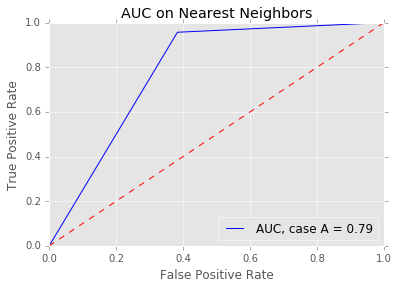

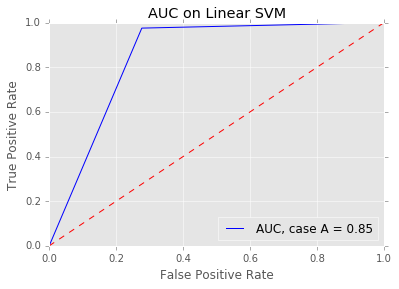

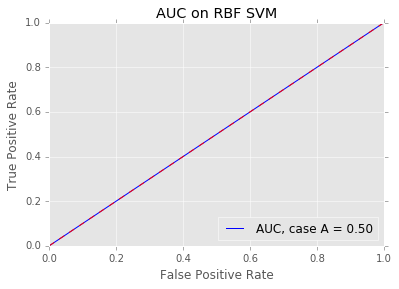

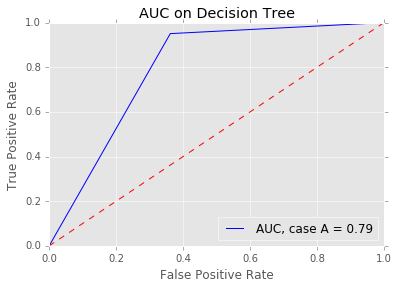

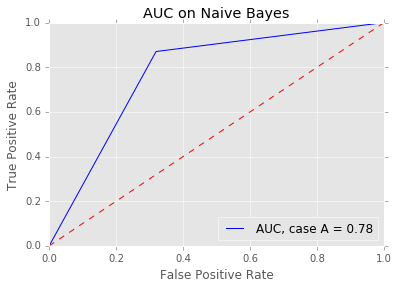

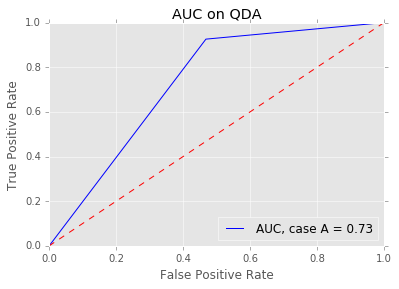

In [374]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, Y = processed_students.drop(["G3"], axis=1), grades_to_binary(processed_students.G3)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=442)
i = 1
plot_roc.current=0

    # iterate over classifiers
for name, clf in zip(names, classifiers):
    plot_roc.current=0
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    plt.figure()
    plt.title("AUC on "+name)
    plot_roc(y_test, predictions, 2)


* Подберем параметры для LinearSVM на датасете с оценками за оба предмета
* Построим ROC кривую на тесте
* Визуализируем зависимость результатов от параметров С и gamma, c помощью HeatMap

In [380]:
from matplotlib.colors import Normalize

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

In [410]:
def train_cv_lsvm(data, target, folds=10):
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state =442)
    
    C_range = np.logspace(-2, 10, 13)
    gamma_range = np.logspace(-9, 3, 13)
    svm_grid = {'C': C_range, 
                #'kernel': ['linear', 'rbf'], 
                'gamma': gamma_range}
    
    svm_grid= GridSearchCV(SVC(), param_grid=svm_grid, cv=folds, n_jobs=3)
    svm_grid.fit(X_train, y_train)
    
    predictions = svm_grid.best_estimator_.predict(X_test)
    plot_roc(y_test.ravel(), predictions.ravel(), len(y_test.unique()))

    scores = [x[1] for x in svm_grid.grid_scores_]
    scores = np.array(scores).reshape(len(C_range), len(gamma_range))
    
    plt.figure(figsize = (12, 8))
    plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot, norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
    plt.xlabel('$\gamma$', fontsize="xx-large")
    plt.ylabel('$C$', rotation=0, fontsize="xx-large")
    plt.colorbar()
    plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=0)
    plt.yticks(np.arange(len(C_range)), C_range)
    plt.title('Validation accuracy')
    plt.show()
    

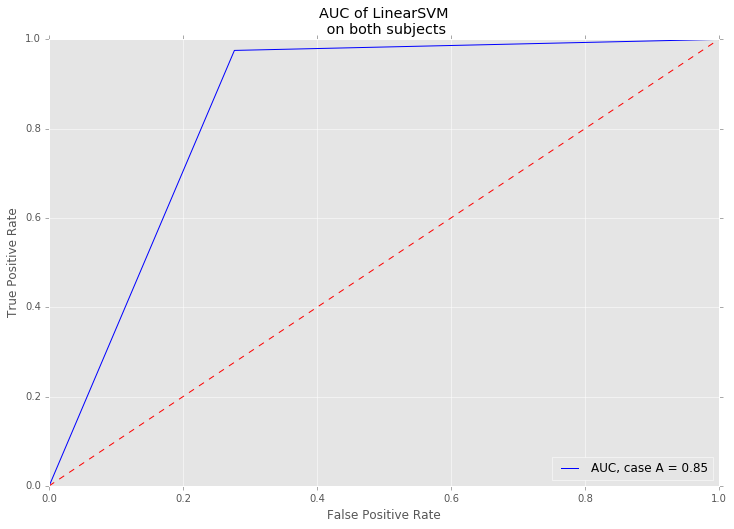

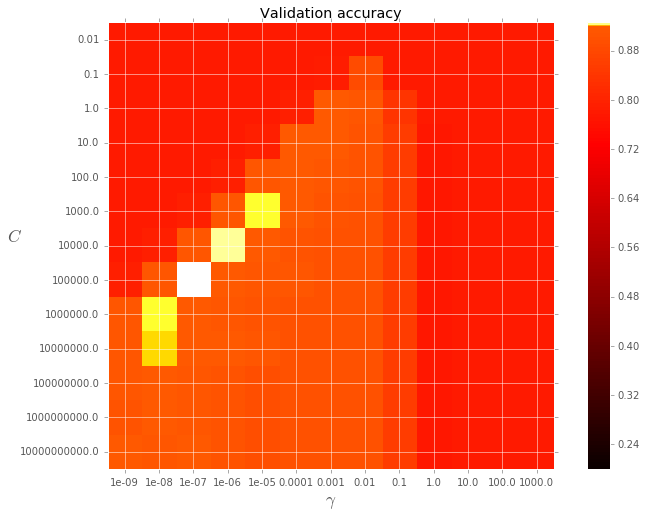

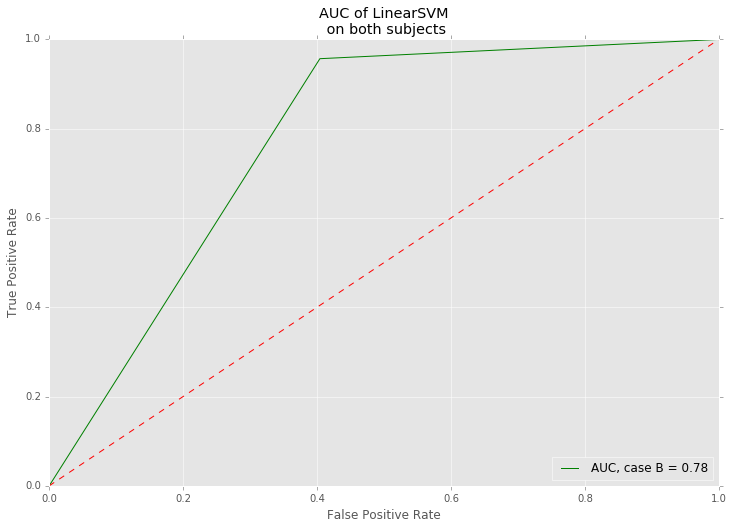

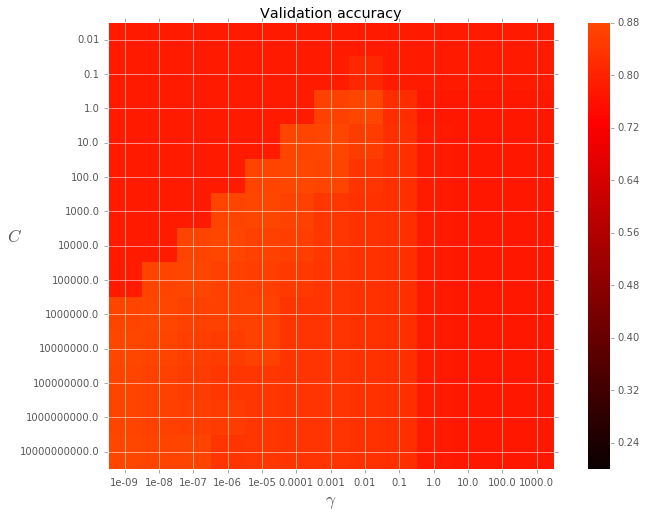

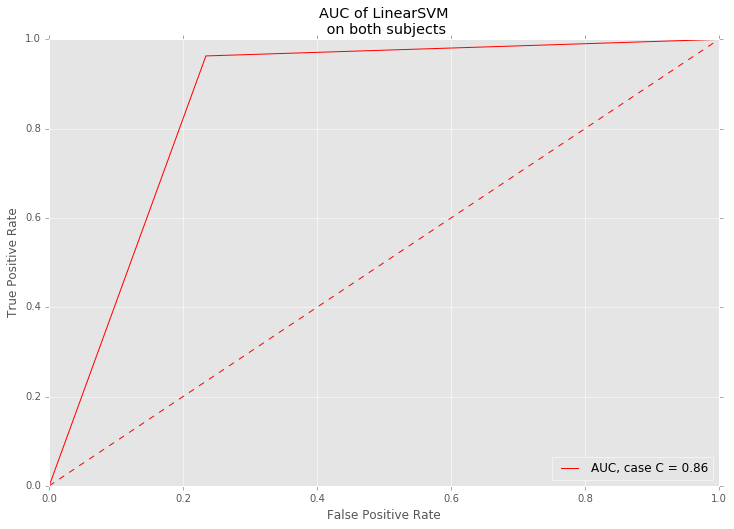

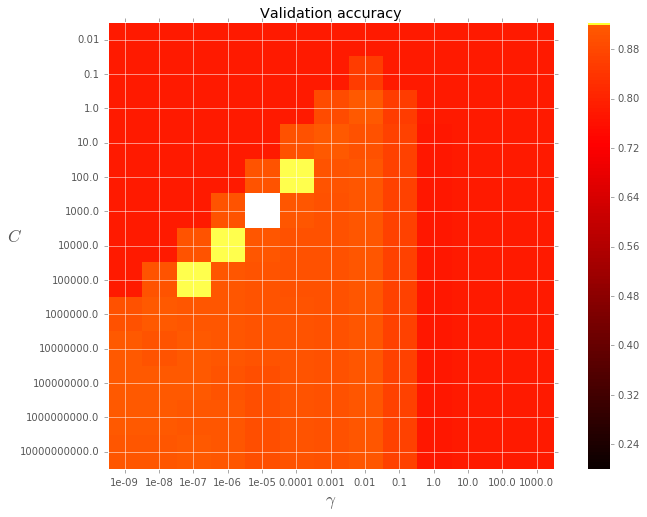

In [411]:

plot_roc.current = 0
for to_drop in [A, B, C]:
    plt.figure(figsize = (12, 8))
    plt.title("AUC of LinearSVM\n on both subjects")
    X = processed_students.drop(to_drop, axis=1)
    Y = grades_to_binary(processed_students.G3)
    train_cv_lsvm(X, Y)
